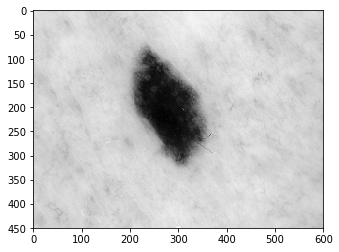

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import os
from sklearn import metrics

PATH_MELANOMA = '../DermMel/test/Melanoma'
PATH_NOTMELANOMA = '../DermMel/test/NotMelanoma'
PATH_GENERATE_DIC = '../DermMel/geracao_dicionario'

files_path_dic = os.listdir(PATH_GENERATE_DIC) 
files_path_dic = [PATH_GENERATE_DIC + '/' + path for path in files_path_dic]

dic_des = []
palavras = []
array_desc = []

for path_img in files_path_dic:
#     img = cv2.imread(path_img)
#     plt.imshow(img[:,:,::-1])
    # plt.show()

    img = cv2.imread(path_img,0) # Leitura da imagem com filtro em escada de cinza
    plt.gray()
    plt.imshow(img)
    # plt.show()

    sift = cv2.xfeatures2d.SIFT_create()

    # Encontrando os pontos-de-interesse
    kp = sift.detect(img,None)

    # computando o vetor-de-característica para cada ponto detectado
    kp, des = sift.compute(img, kp)
                    
    dic_des.extend(des)       

# print(dic_des)
# Print da imagem com regiões de interesse destacadas
# img2 = cv2.drawKeypoints(img, kp, None)
# plt.imshow(img2),plt.show()


# Clusterização por meio de Kmeans
K = 45

kmeans_model = KMeans(n_clusters=K).fit(dic_des) #dic_des são os vetores-de-características concatenados

# criando o dicionário de palavras
palavras = np.array(kmeans_model.cluster_centers_)


In [ ]:
'''
Método de extração de arquivo .arff. Autor: Glauco Vitor.
'''

def gravar_arquivo_arff(base_teste, classes): # 0 para NAO_MELANOMA e 1 para MELANOMA
    tam = len(base_teste[0][0])
    file = open('dic_k45.arff','w') 
 
    file.write('@relation cancer\n') 
    for i in range(tam):
        file.write('@attribute '+ str(i) +' NUMERIC\n') 
    
    file.write('@attribute classes {')
    
    a = set(classes)
    
    for i in a:
        file.write(str(i)+',')
    
    file.write('}')    
    
    for i in range(tam):
         len(set(classes))
    
    file.write('\n@data\n') 

    for item in base_teste:
        for i in range(len(item[0])):
            file.write("%s," % str(item[0][i])) 
        file.write("%s\n" % item[1])    
 
    file.close() 
    print('arquivo gravado')


In [ ]:
'''
Distância euclidiana para a atribuição dos centróides a cada elemento da imagem.
'''

def distancia(a, b):
    M = len(a)
    soma = 0
    for i in range(M):
        soma = soma + ((a[i]-b[i])**2)
    return np.sqrt(soma)


In [ ]:
'''
Método de extração para todas as imagens da base de treinamento. 
O vetor de descrição tomado por base é o que foi gerado no início.
'''

def extrair_caracteristica(img):
    sift = cv2.xfeatures2d.SIFT_create()
    # encontrando os pontos-de-interesse
    kp = sift.detect(img,None)
#     print('Qtde Pontos Detectados: ', len(kp))
    
    kp, des = sift.compute(img, kp)
    pontos_rotulados = []

    for ponto in des:
        min = 9999
        label = -1
        for i in range(len(palavras)):
            dist = distancia(ponto, palavras[i])
            if(dist < min):
                min = dist
                label = i
        pontos_rotulados.append(label)
    
    hist = np.zeros(K)

    for i in pontos_rotulados:
        hist[i] += 1
    
    return hist # Frequência em que cada palavra centroide aparece

In [ ]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn import metrics

files_path_nao_melanoma = os.listdir(PATH_NOTMELANOMA) 
files_path_nao_melanoma = [PATH_NOTMELANOMA+'/'+path for path in files_path_nao_melanoma]
files_path_melanoma = os.listdir(PATH_MELANOMA)
files_path_melanoma = [PATH_MELANOMA+'/'+path for path in files_path_melanoma]


all_image_paths = [files_path_nao_melanoma, files_path_melanoma]

base = []
classes = []

#extraindo as características das imagens na base de dados
for i in range(len(all_image_paths)):
    for img_path in all_image_paths[i][:500]:
        imagem = cv2.imread(img_path)
        caracteristica = extrair_caracteristica(imagem)
        classes.append(i)
        base.append((caracteristica, i))
    print('Classe final: '+str(i))

gravar_arquivo_arff(base, classes)